# 🛡️ Diabetes Prediction: Robust & Fine-Tuned Approach
**Author:** Silvio Christian, Joe

---
### 📌 PROJECT NOTE: BEST PRACTICE IMPLEMENTATION
Unlike the "Replication Study" repository, this notebook implements a **Leakage-Free Machine Learning Pipeline**.

**Key Methodologies:**
1.  **Train-Test Split FIRST:** Data is split immediately to isolate the testing set.
2.  **No Data Leakage:** Scaling and SMOTE are applied **ONLY** to the Training Set. The Test Set remains pure and unseen.
3.  **Hyperparameter Tuning:** Utilizing GridSearch/RandomSearch to optimize model performance metrics (Focus on Recall/F1).
---

# 📦 Install Required Libraries

Make sure all required packages are installed. Here, we install `scikit-learn==1.4.2` to ensure compatibility with this notebook.

In [1]:
!pip install -q scikit-learn==1.4.2

# 📥 Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib
import warnings
warnings.filterwarnings("ignore")

# 📊 Load Dataset

In [3]:
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 🔍 Exploratory Data Analysis

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
720,4,83,86,19,0,29.3,0.317,34,0
98,6,93,50,30,64,28.7,0.356,23,0
546,5,187,76,27,207,43.6,1.034,53,1
257,2,114,68,22,0,28.7,0.092,25,0
402,5,136,84,41,88,35.0,0.286,35,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 🧼 Data Preprocessing

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.duplicated().sum()

0

## 🚨 Checking for Invalid Zero Values

We'll check how many records contain a value of **0**, which may indicate missing or incorrect data.  
However, we'll **exclude the `Pregnancies` column**, since it's reasonable for someone to have **0 pregnancies**.

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    zero_count = (df[col] == 0).sum()
    print(f"Number of 0 values in the '{col}' column: {zero_count}")

Number of 0 values in the 'Glucose' column: 5
Number of 0 values in the 'BloodPressure' column: 35
Number of 0 values in the 'SkinThickness' column: 227
Number of 0 values in the 'Insulin' column: 374
Number of 0 values in the 'BMI' column: 11


In [13]:
col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[col] = df[col].replace(0, np.nan)

# imputer = SimpleImputer(strategy='mean')
# df[col] = imputer.fit_transform(df[col])

for c in col:
    df[c] = df[c].fillna(df[c].mean())

In [14]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    zero_count = (df[col] == 0).sum()
    print(f"Number of 0 values in the '{col}' column: {zero_count}")

Number of 0 values in the 'Glucose' column: 0
Number of 0 values in the 'BloodPressure' column: 0
Number of 0 values in the 'SkinThickness' column: 0
Number of 0 values in the 'Insulin' column: 0
Number of 0 values in the 'BMI' column: 0


In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


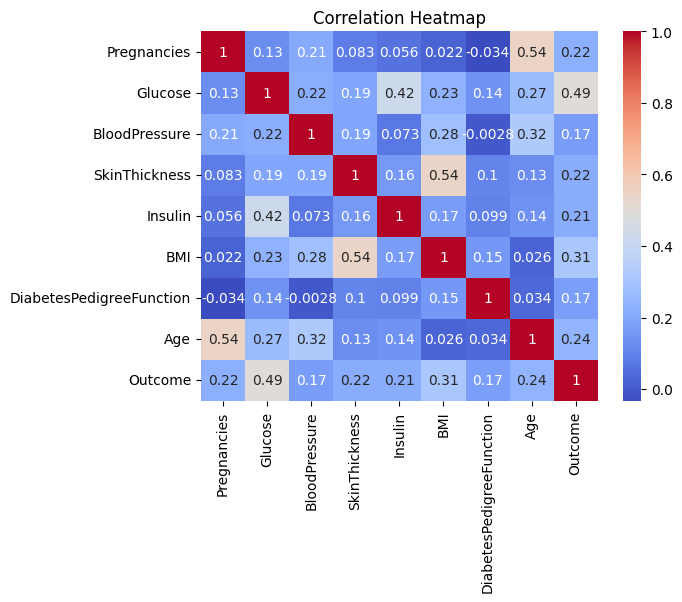

In [16]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## 🧪 Splitting Features and Target

In [17]:
X = df.drop("Outcome", axis  = 1)
y = df["Outcome"]

## 🧠 Feature Importance Analysis

We analyze which input features contribute the most to the model’s predictions using the built-in `.feature_importances_` attribute of the Random Forest model.

Normally, in datasets with a large number of features, we might filter and display only the top N features (e.g., top 10) to avoid clutter and focus on the most relevant ones.

However, since this dataset contains fewer than 10 features, we display all of them directly for full transparency.


In [18]:
rf = RandomForestClassifier(n_estimators = 100, random_state=42)
rf.fit(X, y)

feature_importances = pd.DataFrame({
    'features': X.columns, 
    'importances':rf.feature_importances_
})
feature_importances = feature_importances.sort_values(by='importances', ascending = False)
feature_importances

,features,importances
1,Glucose,0.259385
5,BMI,0.167773
7,Age,0.128885
6,DiabetesPedigreeFunction,0.120873
2,BloodPressure,0.086529
0,Pregnancies,0.083596
4,Insulin,0.083356
3,SkinThickness,0.069602


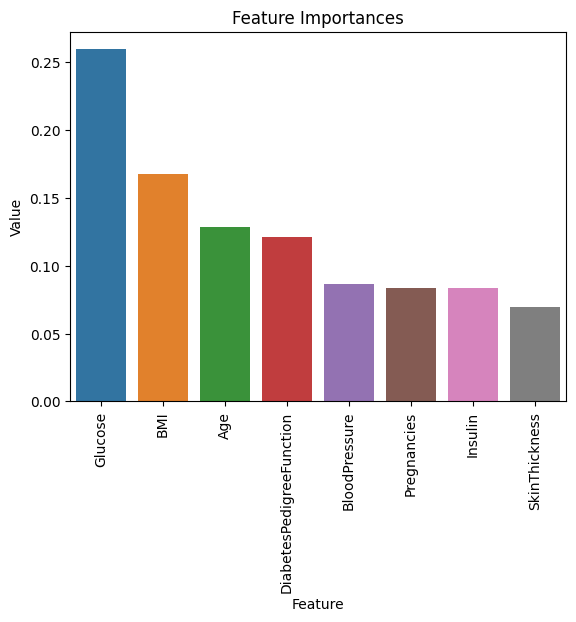

In [19]:
sns.barplot(x = "features", y = "importances", data = feature_importances)
plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.xticks(rotation = 90)
plt.show()

## 📊 Data Split

In [20]:
# =============================================================================
# 1. CRITICAL STEP: DATA SPLITTING
# We split the data BEFORE any preprocessing (Scaling/SMOTE).
# This is the "Golden Rule" to prevent Data Leakage.
# The Test set must represent completely unseen real-world data.
# =============================================================================

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 📏 Feature Scaling (MinMax)

In [21]:
# =============================================================================
# 2. FEATURE SCALING (LEAKAGE-FREE)
# Notice we use .fit_transform() on X_train but ONLY .transform() on X_test.
# The scaler learns parameters (mean/std) only from the training data.
# We do not let the model "peek" at the test data statistics.
# =============================================================================

scaler = MinMaxScaler()

col = X_train.columns
X_train[col] = scaler.fit_transform(X_train[col])
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,0.058824,0.237762,0.387755,0.054348,0.038409,0.184049,0.220935,0.050000
711,0.294118,0.489510,0.551020,0.217391,0.009602,0.233129,0.158129,0.316667
373,0.117647,0.342657,0.346939,0.358696,0.108368,0.341513,0.062806,0.066667
46,0.058824,0.629371,0.326531,0.240798,0.192796,0.235174,0.213808,0.133333
682,0.000000,0.272727,0.408163,0.347826,0.123457,0.539877,0.125612,0.016667


In [22]:
col = X_test.columns
X_test[col] = scaler.transform(X_test[col])
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
44,0.411765,0.720280,0.408163,0.240798,0.192796,0.188139,0.093541,0.316667
672,0.588235,0.083916,0.836735,0.173913,0.046639,0.353783,0.089532,0.433333
700,0.117647,0.461538,0.530612,0.217391,0.253772,0.361963,0.177728,0.083333
630,0.411765,0.405594,0.408163,0.240798,0.192796,0.188139,0.288641,0.216667
81,0.117647,0.125874,0.493930,0.240798,0.192796,0.291564,0.008018,0.016667


# ⚖️ Handling Imbalanced Target Classes

Outcome
0    400
1    214
Name: count, dtype: int64


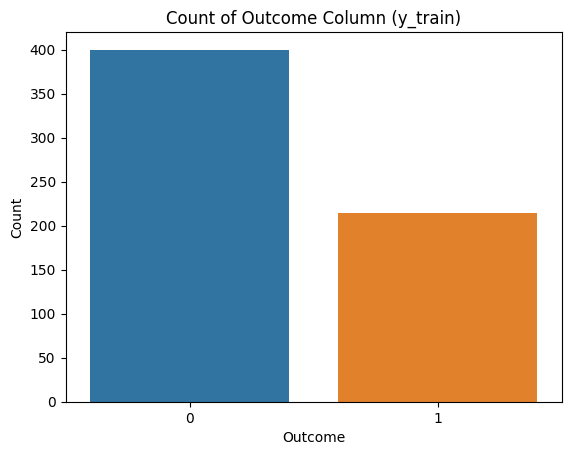

In [23]:
print(y_train.value_counts())

sns.countplot(x = y_train)
plt.title("Count of Outcome Column (y_train)")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

In [24]:
# =============================================================================
# 3. HANDLING IMBALANCE: SMOTE
# SMOTE is applied ONLY to the Training Set.
# Why? Because synthetic data (fake samples) should never exist in the Test set.
# The Test set must remain "Real" to validate true performance.
# =============================================================================

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Outcome
0    400
1    400
Name: count, dtype: int64


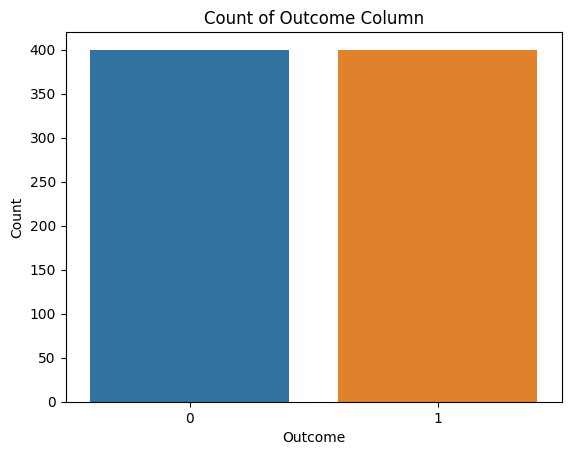

In [25]:
print(y_train_resampled.value_counts())

sns.countplot(x = y_train_resampled)
plt.title("Count of Outcome Column")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

# 🧠 Model Training

## Cross_val_score

In [26]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

In [27]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

all_model_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=skf, scoring='accuracy')
    print(f"{name} - Accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")
    all_model_scores[name] = round(np.mean(scores), 4)

Logistic Regression - Accuracy: 0.7375 (+/- 0.0280)
Random Forest - Accuracy: 0.8213 (+/- 0.0222)
XGBoost - Accuracy: 0.7938 (+/- 0.0304)
Naive Bayes - Accuracy: 0.7263 (+/- 0.0191)
K-Nearest Neighbors - Accuracy: 0.7887 (+/- 0.0283)
Decision Tree - Accuracy: 0.7300 (+/- 0.0266)


In [28]:
pd.Series(all_model_scores).sort_values(ascending=False)

Random Forest          0.8212
XGBoost                0.7938
K-Nearest Neighbors    0.7887
Logistic Regression    0.7375
Decision Tree          0.7300
Naive Bayes            0.7263
dtype: float64

In [29]:
models.pop("Logistic Regression")
models.pop("Naive Bayes")
models.pop("Decision Tree")

DecisionTreeClassifier()

 -  Name: Random Forest
 -  Accuracy: 73.38%
 -  Recall: 72%
 -  Precision: 71%


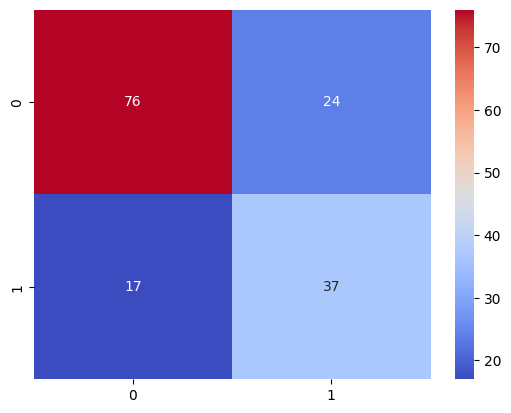

 -  Name: XGBoost
 -  Accuracy: 75.97%
 -  Recall: 73%
 -  Precision: 74%


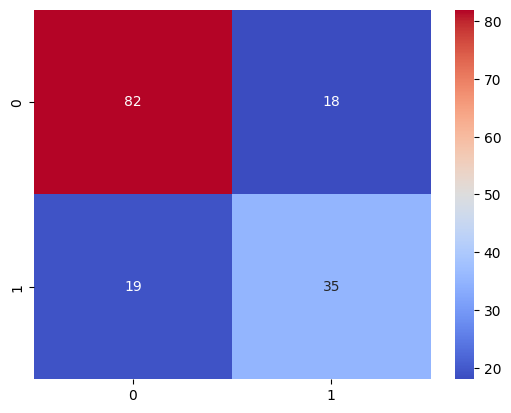

 -  Name: K-Nearest Neighbors
 -  Accuracy: 70.13%
 -  Recall: 71%
 -  Precision: 69%


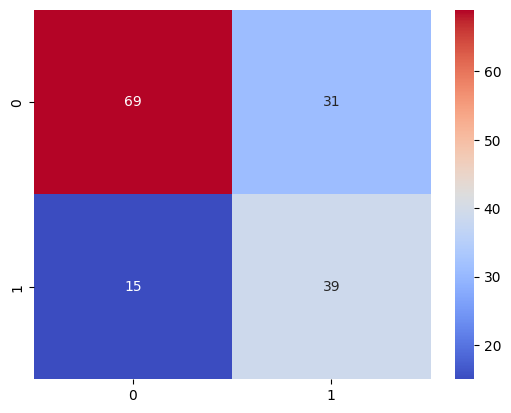

In [30]:
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    acc = round(accuracy_score(y_test, y_pred) * 100, 2)
    recall = round(recall_score(y_test, y_pred, average='macro') * 100)
    precision = round(precision_score(y_test, y_pred, average='macro') * 100)

    print(f" -  Name: {name}")
    print(f" -  Accuracy: {acc}%")
    print(f" -  Recall: {recall}%")
    print(f" -  Precision: {precision}%")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, fmt='g', cmap="coolwarm")
    plt.show()

## Hyperparameter Tuning

In [31]:
# =============================================================================
# 4. HYPERPARAMETER TUNING (MODEL SELECTION: XGBOOST)
# Based on initial model comparison, XGBoost outperformed Random Forest and SVM.
# We now fine-tune XGBoost to maximize 'Recall' (Sensitivity) for diabetes detection.
# =============================================================================

from xgboost import XGBClassifier

# 1. Define the base model
# use_label_encoder=False and eval_metric='logloss' to avoid warnings in newer versions
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# 2. Define the hyperparameter grid to search (Specific for XGBoost)
param_grid = {
    'n_estimators': [100, 200],         # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage (eta)
    'max_depth': [3, 5, 7],             # Maximum depth of a tree (lower prevents overfitting)
    'subsample': [0.8, 1.0],            # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],     # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2]              # Minimum loss reduction required to make a further partition
}

# 3. Use Stratified K-Fold to maintain class balance in each fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Perform Grid Search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=skf,
    scoring='recall',     # Optimizing for Recall 
    n_jobs=-1,            # Utilize all CPU cores
    verbose=1             # show progress but keep the output readable
)

# 5. Fit the model on your (resampled) data
grid_search.fit(X_train_resampled, y_train_resampled)

# 6. Display the best results
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best Recall Score: 0.85


# 🎯 Model Evaluation

 -  Accuracy: 73.38%
 -  Recall: 75%
 -  Precision: 73%


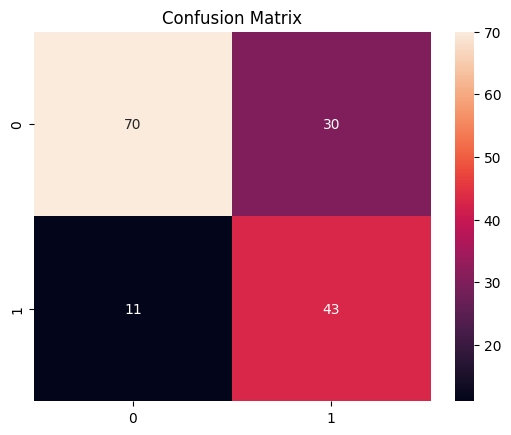

In [32]:
model_hp_tune = grid_search.best_estimator_
y_pred_hp_tune = model_hp_tune.predict(X_test)

acc = round(accuracy_score(y_test, y_pred_hp_tune) * 100, 2)
recall = round(recall_score(y_test, y_pred_hp_tune, average='macro') * 100)
precision = round(precision_score(y_test, y_pred_hp_tune, average='macro') * 100)
print(f" -  Accuracy: {acc}%")
print(f" -  Recall: {recall}%")
print(f" -  Precision: {precision}%")

cm = confusion_matrix(y_test, y_pred_hp_tune)
sns.heatmap(cm, annot=True, fmt='g')
plt.title(f"Confusion Matrix")
plt.show()

# 🚀 Try It Yourself!

In [33]:
# print("Enter patient data for diabetes prediction:\n")

# name = str(input("Patient name: "))
# pregnancies = float(input("Number of pregnancies: "))
# glucose = float(input("Glucose level: "))
# blood_pressure = float(input("Blood pressure: "))
# skin_thickness = float(input("Skin thickness: "))
# insulin = float(input("Insulin level: "))
# bmi = float(input("Body Mass Index (BMI): "))
# dpf = float(input("Diabetes Pedigree Function (DPF): "))
# age = float(input("Age: "))

# input_value = [[pregnancies, glucose, blood_pressure, skin_thickness, insulin,
#                bmi, dpf, age]]
# # example: [[6, 148, 72, 35, 168, 43.1, 2.288, 33]] -> 1

# # Make sure preprocessing is applied
# input_data = scaler.transform(input_value)

# # Predict using the trained model
# prediction = model_hp_tune.predict(input_data)[0]
# result = "Diabetic" if prediction == 1 else "Non-Diabetic"

# print("\n\n\n\nPrediction Result:")
# print(f"Name: {name}")
# print(f"Prediction: {result}")

In [34]:
# print("Enter patient data for diabetes prediction:\n")

# name = str(input("Patient name: "))
# pregnancies = float(input("Number of pregnancies: "))
# glucose = float(input("Glucose level: "))
# blood_pressure = float(input("Blood pressure: "))
# skin_thickness = float(input("Skin thickness: "))
# insulin = float(input("Insulin level: "))
# bmi = float(input("Body Mass Index (BMI): "))
# dpf = float(input("Diabetes Pedigree Function (DPF): "))
# age = float(input("Age: "))

# input_value = [[pregnancies, glucose, blood_pressure, skin_thickness, insulin,
#                bmi, dpf, age]]
# # example: [[2, 100, 72, 23, 85, 27.5, 0.35, 28]] -> 0

# # Make sure preprocessing is applied
# input_data = scaler.transform(input_value)

# # Predict using the trained model
# prediction = model_hp_tune.predict(input_data)[0]
# result = "Diabetic" if prediction == 1 else "Non-Diabetic"

# print("\n\n\n\nPrediction Result:")
# print(f"Name: {name}")
# print(f"Prediction: {result}")

# 💾 Save Model

In [35]:
# 🔹 Save the Scaler
joblib.dump(scaler, "scaler.joblib")
print("✅ Scaler saved successfully!")

# 🔹 Save the Trained Model
joblib.dump(model_hp_tune, "model_hp_tune.joblib")
print("✅ Model saved successfully! 🔥")

✅ Scaler saved successfully!
✅ Model saved successfully! 🔥
